# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


<Axes: xlabel='net_bill', ylabel='tip'>

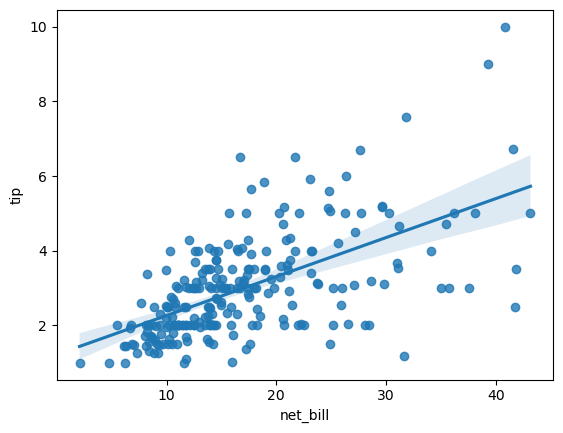

In [7]:
# Gráfico de dispersão
sns.regplot(y = 'tip', x = 'net_bill', data = tips[tips['tip_pct']<.5])

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [4]:
reg = smf.ols('tip ~ net_bill', data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           5.02e-23
Time:                        12:40:40   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

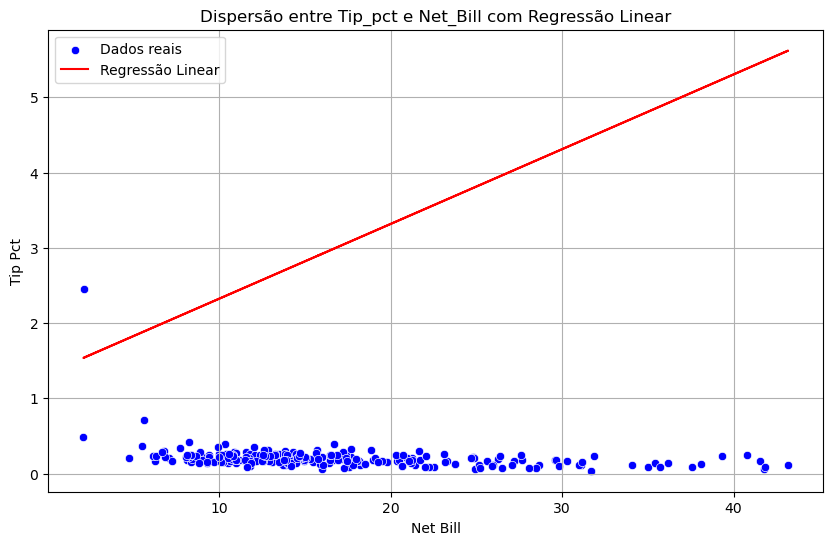

In [14]:
# Fazer previsões baseadas no modelo ajustado
reg.predict(tips[tips['tip_pct']<.5])

# 2. Construir o gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x='net_bill', y='tip_pct', data=tips, color='blue', label='Dados reais')

# Adicionar a linha de regressão
plt.plot(tips['net_bill'], tips['predicted_tip_pct'], color='red', label='Regressão Linear')

# Configurar o gráfico
plt.title('Dispersão entre Tip_pct e Net_Bill com Regressão Linear')
plt.xlabel('Net Bill')
plt.ylabel('Tip Pct')
plt.legend()
plt.grid(True)
plt.show()

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

In [20]:
print('\n O primeiro é mais linear, enquanto o segundo mostra uma padrão mais estabilizado. O R² pode ser comparado diretamente, porém no primeiro gráfico os valores são absolutos, enquanto no segundo, são proporcionais, necessitando diferentes perspectivas para interpretar.')


 O primeiro é mais linear, enquanto o segundo mostra uma padrão mais estabilizado. O R² pode ser comparado diretamente, porém no primeiro gráfico os valores são absolutos, enquanto no segundo, são proporcionais, necessitando diferentes perspectivas para interpretar.


### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [23]:
from sklearn.metrics import r2_score

#1
reg = smf.ols('tip_pct ~ net_bill', data=tips).fit()

# 2. Obter os valores preditos de tip_pct
tips['pred_tip_pct'] = reg.fittedvalues

# 3. Obter os valores preditos para tip
tips['pred_tip'] = tips['pred_tip_pct'] * tips['net_bill']

# 4. Calcular o R² para o modelo de tip
r2_tip = r2_score(tips['tip'], tips['pred_tip'])

# 5. Comparar com o R² do modelo original (tip ~ net_bill)
reg_original = smf.ols('tip ~ net_bill', data=tips).fit()
r2_original = reg_original.rsquared

# Exibir os resultados
print(f"R² do modelo ajustado para 'tip': {r2_tip:.4f}")
print(f"R² do modelo original para 'tip': {r2_original:.4f}")

# Comparar os valores
if r2_tip > r2_original:
    print("O R² do modelo ajustado é maior que o R² do modelo original.")
else:
    print("O R² do modelo original é maior ou igual ao do modelo ajustado.")

R² do modelo ajustado para 'tip': 0.1089
R² do modelo original para 'tip': 0.3325
O R² do modelo original é maior ou igual ao do modelo ajustado.
